In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe

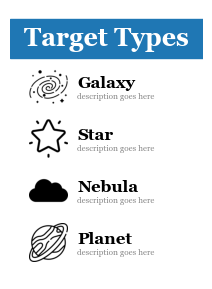

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)

for i,name in enumerate(['galaxy','star','nebula','planet']):
    # Add circle
    circle = plt.Circle((300, 200), 150, color='white', alpha=0.5, zorder=1)
    ax.add_patch(circle)
    
    # Add Object Icon
    icon1 = Image.open(f'icons/{name}.png').resize((200,200))
    x,y = 100,(900-(100*i*2.7))
    ax.imshow(icon1, extent=(x,x+200,y,y+200),zorder=3)
    
    ax.text(x+250, y+120, name.title(), ha='left', va='center', color='k',
             fontsize=12, font='Georgia', fontweight='bold')
    
    ax.text(x+250, y+50, 'description goes here', ha='left', va='center', color='#888888',
             fontsize=6, font='Georgia')

    
    

# Title Text
ax.text(500, 1250, 'Target Types', ha='center', va='center', color='white',
             fontsize=18, font='Georgia', fontweight='bold')



# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

#plt.savefig(f'final_cards/target_types.png', bbox_inches='tight')
plt.show()
    